# Baselines

Características:
* Rango de n-gramas: 3
* Frecuencia mínima de aparición: 3
* Conjunto de datos en crudo

## Imports

In [1]:
import sys
sys.path.append('../../../Scripts/')

In [2]:
import pandas as pd, numpy as np
import baseline_model as b
import plots as p
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

## Paths

In [4]:
main_path = '../Datasets/CSV/'

In [5]:
# English
data_training_en_path = f'{main_path}Train-EN.csv'
data_test_en_path = f'{main_path}Test-EN.csv'

# Spanish
data_training_es_path = f'{main_path}Train-ES.csv'
data_test_es_path = f'{main_path}Test-ES.csv'

## Data

In [6]:
# English
data_training_en = pd.read_csv(data_training_en_path).dropna()
data_test_en = pd.read_csv(data_test_en_path).dropna()

# Spanish
data_training_es = pd.read_csv(data_training_es_path).dropna()
data_test_es = pd.read_csv(data_test_es_path).dropna()

In [7]:
data_training_gender_en = data_training_en[data_training_en.author != 'bot']
data_test_gender_en = data_test_en[data_test_en.author != 'bot']

data_training_gender_es = data_training_es[data_training_es.author != 'bot']
data_test_gender_es = data_test_es[data_test_es.author != 'bot']

In [8]:
data_training_en.shape[0], data_test_en.shape[0]

(412000, 264000)

## General params

In [9]:
seed = 42
target_names = ['human', 'bot']
gender_names = ['gender_1', 'gender_2']
ngram_ranges = [(1, 1), (1,2), (1, 3)]
min_dfs = [1, 3]
models = [LogisticRegression(random_state = seed, penalty = 'l2', solver = 'liblinear', max_iter = 10000),
          CalibratedClassifierCV(LinearSVC(random_state = seed, penalty = 'l2', max_iter = 10000)),
          RandomForestClassifier(max_depth = 100, random_state = seed)]
model_names = ['LR', 'LSVC', 'RF']

## Author

In [10]:
models_author_en, vectorizers_author_en, metrics_author_en = [], [], []

for i, model in enumerate(models):
    for min_df in min_dfs:
        for ngram_range in ngram_ranges:
            # Creating objects
            author_en = b.Baseline(model=model, 
                                train_data=data_training_en, 
                                test_data=data_test_en, 
                                x_label_column='tweet',
                                y_label_column='author',
                                ngram_range=ngram_range,
                                min_df=min_df,
                                model_name=model_names[i],
                                target_names=target_names)
            
            # Running baselines
            model, vectorizer, metrics = author_en.baseline()
            
            # Saving info
            models_author_en.append(model)
            vectorizers_author_en.append(vectorizer)
            metrics_author_en.append(metrics) 

Model LR (author-(1, 1)-1) --> Accuracy: 0.7819318181818182
Model LR (author-(1, 2)-1) --> Accuracy: 0.7909772727272727
Model LR (author-(1, 3)-1) --> Accuracy: 0.7914621212121212
Model LR (author-(1, 1)-3) --> Accuracy: 0.7789280303030303
Model LR (author-(1, 2)-3) --> Accuracy: 0.7863674242424242
Model LR (author-(1, 3)-3) --> Accuracy: 0.7849356060606061
Model LSVC (author-(1, 1)-1) --> Accuracy: 0.780344696969697
Model LSVC (author-(1, 2)-1) --> Accuracy: 0.7936212121212122
Model LSVC (author-(1, 3)-1) --> Accuracy: 0.7945454545454546
Model LSVC (author-(1, 1)-3) --> Accuracy: 0.7729659090909091
Model LSVC (author-(1, 2)-3) --> Accuracy: 0.7780227272727273
Model LSVC (author-(1, 3)-3) --> Accuracy: 0.7775454545454545
Model RF (author-(1, 1)-1) --> Accuracy: 0.7474962121212121
Model RF (author-(1, 2)-1) --> Accuracy: 0.7379318181818182
Model RF (author-(1, 3)-1) --> Accuracy: 0.7274242424242424
Model RF (author-(1, 1)-3) --> Accuracy: 0.7605265151515151
Model RF (author-(1, 2)-3) --

In [11]:
models_author_es, vectorizers_author_es, metrics_author_es = [], [], []

for i, model in enumerate(models):
    for min_df in min_dfs:
        for ngram_range in ngram_ranges:
            # Spanish
            author_es = b.Baseline(model=model, 
                            train_data=data_training_es, 
                            test_data=data_test_es, 
                            x_label_column='tweet',
                            y_label_column='author',
                            ngram_range=ngram_range,
                            min_df=min_df,
                            model_name=model_names[i],
                            target_names=target_names)
            
            # Running baselines
            model, vectorizer, metrics = author_es.baseline()
            
            # Saving info
            models_author_es.append(model)
            vectorizers_author_es.append(vectorizer)
            metrics_author_es.append(metrics) 

Model LR (author-(1, 1)-1) --> Accuracy: 0.7608444444444444
Model LR (author-(1, 2)-1) --> Accuracy: 0.7632277777777777
Model LR (author-(1, 3)-1) --> Accuracy: 0.7632611111111111
Model LR (author-(1, 1)-3) --> Accuracy: 0.7634388888888889
Model LR (author-(1, 2)-3) --> Accuracy: 0.7669166666666667
Model LR (author-(1, 3)-3) --> Accuracy: 0.7631666666666667
Model LSVC (author-(1, 1)-1) --> Accuracy: 0.7502388888888889
Model LSVC (author-(1, 2)-1) --> Accuracy: 0.7609111111111111
Model LSVC (author-(1, 3)-1) --> Accuracy: 0.7647555555555555
Model LSVC (author-(1, 1)-3) --> Accuracy: 0.7382333333333333
Model LSVC (author-(1, 2)-3) --> Accuracy: 0.7321222222222222
Model LSVC (author-(1, 3)-3) --> Accuracy: 0.7278111111111111
Model RF (author-(1, 1)-1) --> Accuracy: 0.72515
Model RF (author-(1, 2)-1) --> Accuracy: 0.7018888888888889
Model RF (author-(1, 3)-1) --> Accuracy: 0.7021777777777778
Model RF (author-(1, 1)-3) --> Accuracy: 0.7345722222222222
Model RF (author-(1, 2)-3) --> Accuracy

## Gender

In [12]:
models_gender_en, vectorizers_gender_en, metrics_gender_en = [], [], []

for i, model in enumerate(models):
    for min_df in min_dfs:
        for ngram_range in ngram_ranges:
            # Spanish
            gender_en = b.Baseline(model=model, 
                            train_data=data_training_gender_en, 
                            test_data=data_test_gender_en, 
                            x_label_column='tweet',
                            y_label_column='gender',
                            ngram_range=ngram_range,
                            min_df=min_df,
                            model_name=model_names[i],
                            target_names=gender_names)
            
            # Running baselines
            model, vectorizer, metrics = gender_en.baseline()
            
            # Saving info
            models_gender_en.append(model)
            vectorizers_gender_en.append(vectorizer)
            metrics_gender_en.append(metrics) 

Model LR (gender-(1, 1)-1) --> Accuracy: 0.5967424242424243
Model LR (gender-(1, 2)-1) --> Accuracy: 0.5984545454545455
Model LR (gender-(1, 3)-1) --> Accuracy: 0.5958939393939394
Model LR (gender-(1, 1)-3) --> Accuracy: 0.5913636363636363
Model LR (gender-(1, 2)-3) --> Accuracy: 0.5923333333333334
Model LR (gender-(1, 3)-3) --> Accuracy: 0.5921287878787879
Model LSVC (gender-(1, 1)-1) --> Accuracy: 0.5898787878787879
Model LSVC (gender-(1, 2)-1) --> Accuracy: 0.5952575757575758
Model LSVC (gender-(1, 3)-1) --> Accuracy: 0.5960606060606061
Model LSVC (gender-(1, 1)-3) --> Accuracy: 0.5810227272727273
Model LSVC (gender-(1, 2)-3) --> Accuracy: 0.5789621212121212
Model LSVC (gender-(1, 3)-3) --> Accuracy: 0.5784772727272727
Model RF (gender-(1, 1)-1) --> Accuracy: 0.5731590909090909
Model RF (gender-(1, 2)-1) --> Accuracy: 0.5643257575757575
Model RF (gender-(1, 3)-1) --> Accuracy: 0.5586060606060607
Model RF (gender-(1, 1)-3) --> Accuracy: 0.5737878787878787
Model RF (gender-(1, 2)-3) -

In [10]:
models_gender_es, vectorizers_gender_es, metrics_gender_es = [], [], []

for i, model in enumerate(models):
    for min_df in min_dfs:
        for ngram_range in ngram_ranges:
            # Spanish
            gender_es = b.Baseline(model=model, 
                            train_data=data_training_gender_es, 
                            test_data=data_test_gender_es, 
                            x_label_column='tweet',
                            y_label_column='gender',
                            ngram_range=ngram_range,
                            min_df=min_df,
                            model_name=model_names[i],
                            target_names=gender_names)
            
            # Running baselines
            model, vectorizer, metrics = gender_es.baseline()
            
            # Saving info
            models_gender_es.append(model)
            vectorizers_gender_es.append(vectorizer)
            metrics_gender_es.append(metrics) 

Model LR (gender-(1, 1)-1) --> Accuracy: 0.5688222222222222
Model LR (gender-(1, 2)-1) --> Accuracy: 0.5726777777777777
Model LR (gender-(1, 3)-1) --> Accuracy: 0.5723111111111111
Model LR (gender-(1, 1)-3) --> Accuracy: 0.5644888888888889
Model LR (gender-(1, 2)-3) --> Accuracy: 0.5682444444444444
Model LR (gender-(1, 3)-3) --> Accuracy: 0.5683333333333334
Model LSVC (gender-(1, 1)-1) --> Accuracy: 0.5582888888888888
Model LSVC (gender-(1, 2)-1) --> Accuracy: 0.5686222222222223
Model LSVC (gender-(1, 3)-1) --> Accuracy: 0.5701222222222222
Model LSVC (gender-(1, 1)-3) --> Accuracy: 0.5538444444444445
Model LSVC (gender-(1, 2)-3) --> Accuracy: 0.5569
Model LSVC (gender-(1, 3)-3) --> Accuracy: 0.5575666666666667
Model RF (gender-(1, 1)-1) --> Accuracy: 0.5578777777777778
Model RF (gender-(1, 2)-1) --> Accuracy: 0.5541333333333334
Model RF (gender-(1, 3)-1) --> Accuracy: 0.5437777777777778
Model RF (gender-(1, 1)-3) --> Accuracy: 0.5628222222222222
Model RF (gender-(1, 2)-3) --> Accuracy:

## Modelo ganador

LSVM (1G + 2G + 3G + 1FM)

In [13]:
model = CalibratedClassifierCV(LinearSVC(random_state = seed, penalty = 'l2', max_iter = 10000))
model_name = 'LSVC'

In [14]:
author_en = b.Baseline(model=model, 
                                train_data=data_training_en, 
                                test_data=data_test_en, 
                                x_label_column='tweet',
                                y_label_column='author',
                                ngram_range=(1,3),
                                min_df=1,
                                model_name=model_name,
                                target_names=target_names)
            
# Running baselines
model_author_en, vectorizer_author_en, metrics_author_en = author_en.baseline()

Model LSVC (author-(1, 3)-1) --> Accuracy: 0.79


In [15]:
author_es = b.Baseline(model=model, 
                            train_data=data_training_es, 
                            test_data=data_test_es, 
                            x_label_column='tweet',
                            y_label_column='author',
                            ngram_range=(1,3),
                            min_df=1,
                            model_name=model_name,
                            target_names=target_names)
            
# Running baselines
model_author_es, vectorizer_author_es, metrics_author_es = author_es.baseline()

Model LSVC (author-(1, 3)-1) --> Accuracy: 0.76


In [16]:
gender_en = b.Baseline(model=model, 
                            train_data=data_training_gender_en, 
                            test_data=data_test_gender_en, 
                            x_label_column='tweet',
                            y_label_column='gender',
                            ngram_range=(1,3),
                            min_df=1,
                            model_name=model_name,
                            target_names=gender_names)
            
# Running baselines
model_gender_en, vectorizer_gender_en, metrics_gender_en = gender_en.baseline()

Model LSVC (gender-(1, 3)-1) --> Accuracy: 0.6


In [17]:
gender_es = b.Baseline(model=model, 
                            train_data=data_training_gender_es, 
                            test_data=data_test_gender_es, 
                            x_label_column='tweet',
                            y_label_column='gender',
                            ngram_range=(1,3),
                            min_df=1,
                            model_name=model_name,
                            target_names=gender_names)
            
# Running baselines
model_gender_es, vectorizer_gender_es, metrics_gender_es = gender_es.baseline()

Model LSVC (gender-(1, 3)-1) --> Accuracy: 0.57


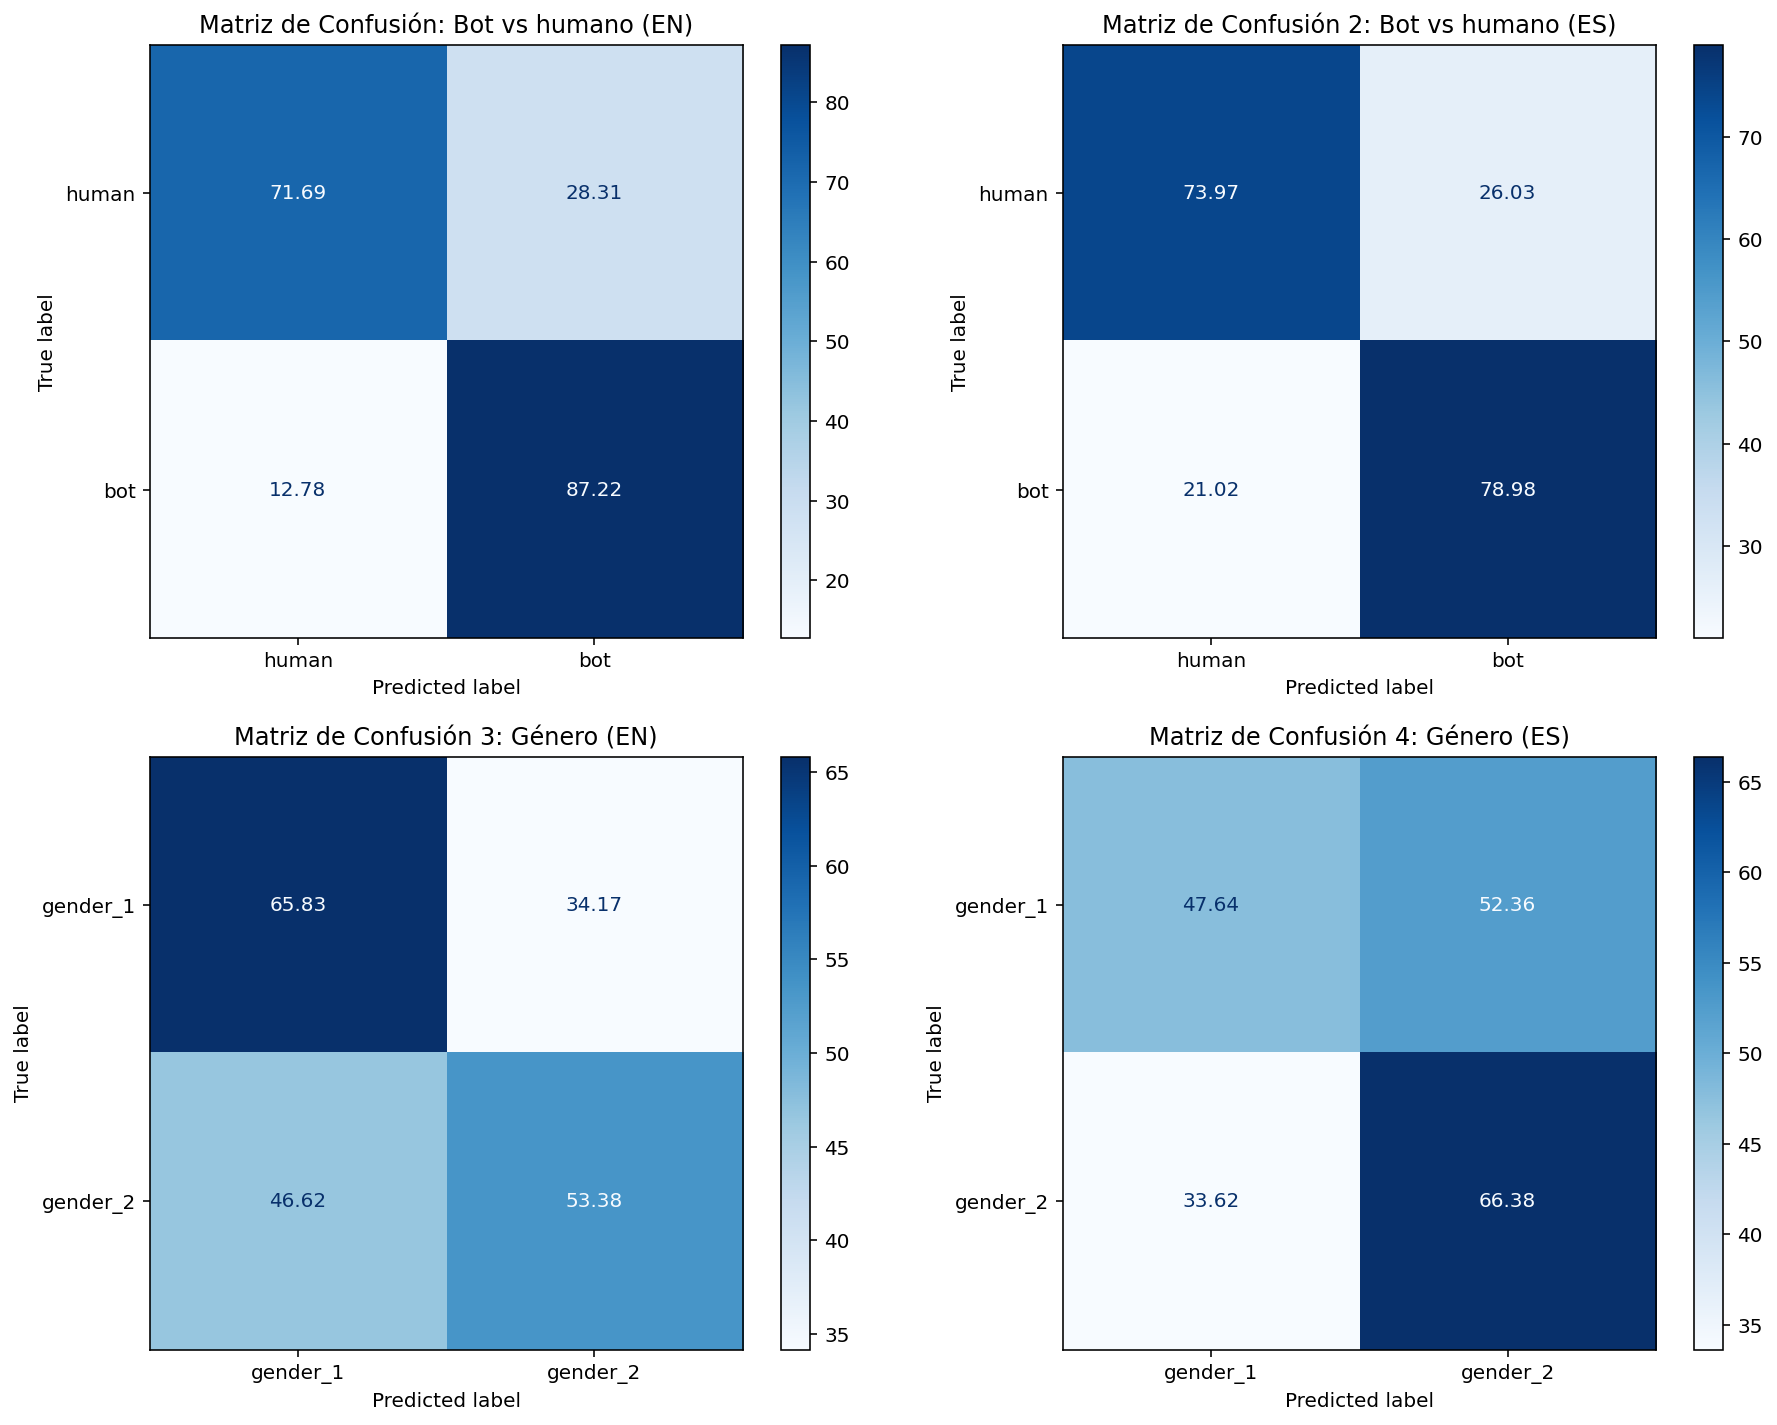

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Matrices de confusión
cm = [metrics_author_en[1], metrics_author_es[1], metrics_gender_en[1], metrics_gender_es[1]]

# Convertimos las matrices de conteo en matrices de porcentajes
cm1_perc = np.round(cm[0] / np.sum(cm[0]) * 200, 2)
cm2_perc = np.round(cm[1] / np.sum(cm[1]) * 200, 2)
cm3_perc = np.round(cm[2] / np.sum(cm[2]) * 200, 2)
cm4_perc = np.round(cm[3] / np.sum(cm[3]) * 200, 2)

# Creamos una figura con 4 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot confusion matrices
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1_perc, display_labels=target_names)
disp1.plot(include_values=True, values_format='.2f', cmap='Blues', ax=ax[0, 0], xticks_rotation='horizontal')
disp1.ax_.set_title('Matriz de Confusión: Bot vs humano (EN)')
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2_perc, display_labels=target_names)
disp2.plot(include_values=True, values_format= '.2f', cmap='Blues', ax=ax[0, 1], xticks_rotation='horizontal')
disp2.ax_.set_title('Matriz de Confusión 2: Bot vs humano (ES)')
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3_perc, display_labels=gender_names)
disp3.plot(include_values=True, values_format= '.2f', cmap='Blues', ax=ax[1, 0], xticks_rotation='horizontal')
disp3.ax_.set_title('Matriz de Confusión 3: Género (EN)')
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4_perc, display_labels=gender_names)
disp4.plot(include_values=True, values_format= '.2f', cmap='Blues', ax=ax[1, 1], xticks_rotation='horizontal')
disp4.ax_.set_title('Matriz de Confusión 4: Género (ES)')

# Show figure
plt.show()